Shape of dataframe before dropping nullvalues- (2126, 14)
Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')
Count of missing values in each columns- LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
Shape of dataframe before dropping nullvalues- (2105, 14)
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object
['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']
14
LB
"LB" column datatype is float64
AC
"AC" column datatype is float64
FM
"FM" col

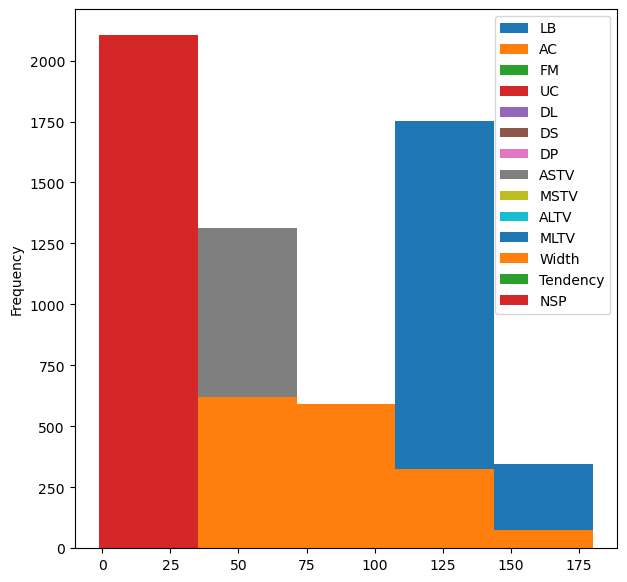

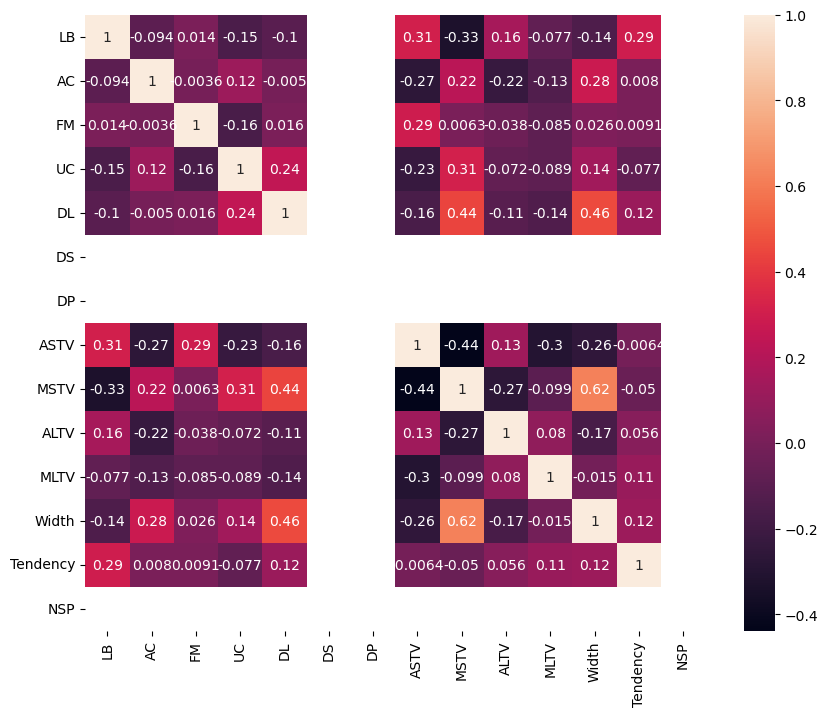

                LB        AC        FM        UC        DL  DS  DP      ASTV  \
LB        1.000000 -0.094109  0.013531 -0.152896 -0.104251 NaN NaN  0.305458   
AC       -0.094109  1.000000 -0.003643  0.123541 -0.004992 NaN NaN -0.265719   
FM        0.013531 -0.003643  1.000000 -0.162812  0.015926 NaN NaN  0.287886   
UC       -0.152896  0.123541 -0.162812  1.000000  0.244295 NaN NaN -0.230011   
DL       -0.104251 -0.004992  0.015926  0.244295  1.000000 NaN NaN -0.158375   
DS             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
DP             NaN       NaN       NaN       NaN       NaN NaN NaN       NaN   
ASTV      0.305458 -0.265719  0.287886 -0.230011 -0.158375 NaN NaN  1.000000   
MSTV     -0.329656  0.222668  0.006326  0.311643  0.439096 NaN NaN -0.438175   
ALTV      0.156716 -0.224978 -0.038421 -0.071729 -0.109855 NaN NaN  0.134710   
MLTV     -0.076964 -0.133953 -0.084950 -0.089178 -0.135581 NaN NaN -0.303111   
Width    -0.142803  0.278472  0.025650  

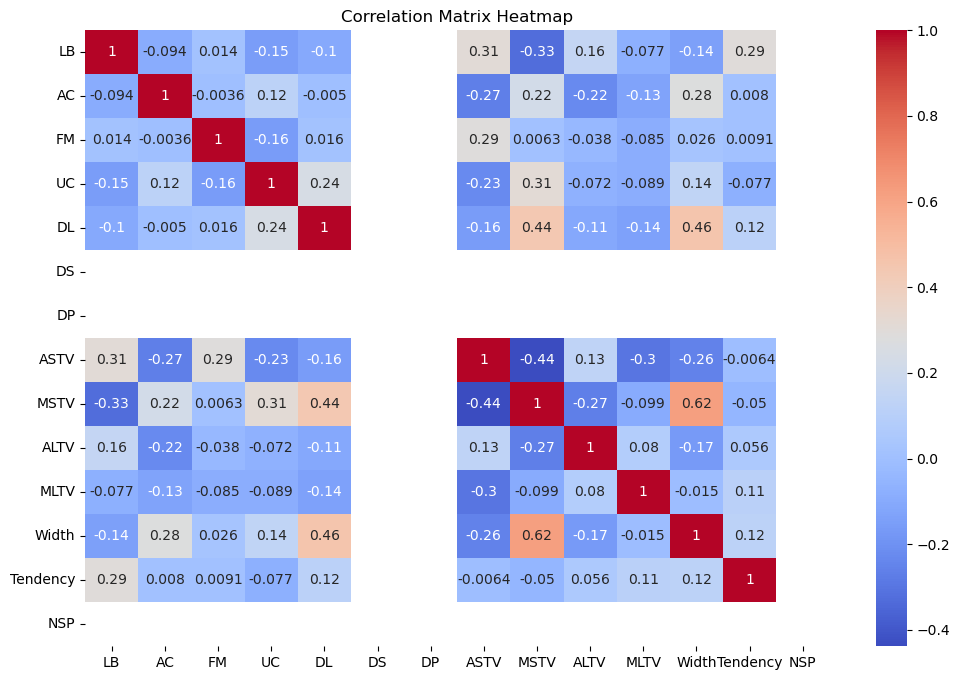

In [7]:
#1.	Data Cleaning and Preparation:
 #Load the dataset into a DataFrame or equivalent data structure.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv(
    "C:\\Users\\pshan\\OneDrive\\Documents\\Practise\\DS_Assignments_Git\\DS_Assignments1\\EDA1\\EDA1\\Cardiotocographic.csv")
print("Shape of dataframe before dropping nullvalues-",df.shape)
print(df.columns)
#Count of missing values in each column
print("Count of missing values in each columns-",df.isnull().sum())
#Handle missing values appropriately (e.g., imputation, deletion).
  #drop the rows that has missing values
df_cleaned = df.dropna().copy()
print("Shape of dataframe before dropping nullvalues-",df_cleaned.shape)
 #Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
df_cleaned.columns
df_cleaned
print(df_cleaned.dtypes)
column_names = df.columns.tolist()
print(column_names)
print(len(column_names))
   #Check for any inconsistencies in data types and correct if required
for i in range(0,len(column_names)):
    j=column_names[i]
    print(j)
    if not (df_cleaned[j].dtypes == "int64" or df_cleaned[j].dtypes == "float64"):
        df_cleaned.loc[:, j] = pd.to_numeric(df_cleaned[j], errors='coerce')
    print(f'"{j}" column datatype is {df_cleaned[j].dtypes}')

#Detect and treat outliers if necessary.

# Detect and handle outliers using IQR
def handle_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    lower_outliers = df[df[col] < lower_bound]
    higher_outliers = df[df[col] > upper_bound]
    print(f'Lower outliers for column-{col}: {lower_outliers[col].values}')
    print(f'Higher outliers for column-{col}: {higher_outliers[col].values}')
    df.loc[df[col] < lower_bound, col] = df[col].median()
    df.loc[df[col] > upper_bound, col] = df[col].median()

for col in df_cleaned.select_dtypes(include=['int64', 'float64']).columns:
    print("col=",col)
    handle_outliers(df_cleaned, col)

print(df_cleaned.describe())

#2.	Statistical Summary:
 #Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
 #Highlight any interesting findings from this summary.
df_numeric = df_cleaned.select_dtypes(include=['int64', 'float64'])

# 3.	Calculate the mean, median, mode, and standard deviation for these columns.
colcount = len(df_numeric.columns)

for i in range(0, colcount):
    colname = df_numeric.columns[i]
    # Mean
    mean = df_numeric[colname].mean(axis=0) #axis=0 means the operation is performed column-wise (down the rows).
    print(f'Mean for column-{colname} is: {mean}')
    # Median
    median = df_numeric[colname].median(axis=0)
    print(f'Median for column-{colname} is: {median}')

    # Standard Deviation
    stddeviation = df_numeric[colname].std(axis=0)
    print(f'std deviation for column-{colname} is: {stddeviation}')

    # Mode
    mode = df_numeric[colname].mode()[0]
    print(f'mode for column-{colname} is: {mode}')

    #IQR
    Q1 = df_numeric[colname].quantile(0.25)
    Q3 = df_numeric[colname].quantile(0.75)
    IQR = Q3 - Q1
    print("Interquartile Range (IQR) for column '%s': %s" % (colname, IQR))

#3.	Data Visualization:
 #Create histograms or boxplots to visualize the distributions of various numerical variables.
print(df_numeric.info())
print(df_numeric.describe())
# Data Visualization
# 1.Histograms:
# Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.
df_numeric.plot(kind='hist', bins=5, figsize=(7, 7))
for i in range(0, colcount):
    colname = df_numeric.columns[i]
    # Skewness-it is a measure of assymetry in the distribution->-ve skewness->mass distribution is concentrated on the left,-+ve skewness->mass distribution is concentrated on the right
    # Kurtosis-How sharp is the the curve (defines how the data is spreaded)
    # The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution
    skew = df_numeric[colname].skew(axis=0)
    print(f'skew for column-{colname} is: {skew}')
    # skewness is between ‐2 to +2 and kurtosis is between ‐7 to +7 are considered acceptable in order to prove normal univariate distribution
    if skew < 0:
        print(f'skew for column-{colname} is negative and its mass distribution is concentrated on the left')
    elif skew > 0:
        print(f'skew for column-{colname} is positive and its mass distribution is concentrated on the right')
    elif skew == 0:
        print(f'skew for column-{colname} is zero,it is symmetrical.')

    # Kurtosis
    kurt = df_numeric[colname].kurt(axis=0)
    print(f'kurt for column-{colname} is: {kurt}')
    # Leptokurtic-When kurtosis is positive, the distribution has heavier tails and a sharper peak than a normal distribution. This indicates that the data has more extreme outliers than a normal distribution.
    # Platykurtic-When kurtosis is negative, the distribution has lighter tails and a flatter peak than a normal distribution. This indicates that the data has fewer extreme outliers than a normal distribution
    # mesokurtic- which means the data is , which indicates that the data follows a normal distribution.
    if kurt < 0:
        print(
            f'kurtosis for column-{colname} is positive-Leptokurtic and the distribution has heavier tails and a sharper peak than a normal distribution')
    elif kurt > 0:
        print(
            f'kurtosis for column-{colname} is negative-Platykurtic and the distribution has lighter tails and a flatter peak than a normal distribution. This indicates that the data has fewer extreme outliers than a normal distribution')
    elif kurt == 0:
        print(
            f'kurtosis for column-{colname} is negative-mesokurtic which indicates that the data follows a normal distribution')

 #Use bar charts or pie charts to display the frequency of categories for categorical variables.
df_categorical = df_cleaned.select_dtypes(include=['category'])
df_categorical
if df_categorical.empty == False:
    print("df_categorical is not empty")
    data = {
    'Category': df_categorical.columns,  # Using column names as categories
    'Values': df_cleaned[df_categorical.columns].apply(lambda col: col.value_counts().sum(), axis=0)  # Summing value counts
    }
    df = pd.DataFrame(data)
    plt.figure(figsize=(10, 6))
    plt.bar(df['Category'], df['Values'], color='skyblue')
    plt.xlabel('Category')
    plt.ylabel('Values')
    plt.title('Bar Chart Example')
    plt.show()
else:
    print("df_categorical is empty implies there are no data in csv file with datatype-category")


 #Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
z=df_cleaned.corr(numeric_only= True)
# Adjust the figure size
plt.figure(figsize=(10, 8))  # Width: 10, Height: 8
# Create the heatmap
sns.heatmap(z, annot=True)
# Show the plot
plt.show()

#4.	Pattern Recognition and Insights:
 #Identify any correlations between variables and discuss their potential implications.
 #Look for trends or patterns over time if temporal data is available.
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()
print(correlation_matrix)
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
#Following are some of the insights through correlation:
# Positive Correlation:have positive relationship (as one variable increases, so does the other).
#  LB(average fetal heart rate over a period) and ASTV(Percentage of Time with Abnormal Short Term Variability)
#  AC(a sign of fetal well-being) and UC(Uterine Contractions)
#  FM(Fetal Movements) and ASTV(Percentage of Time with Abnormal Short Term Variability)
#  UC(Uterine Contractions) and DL
#  DL(Decelerations Late) and UC(Uterine Contractions)
#  ASTV(Percentage of Time with Abnormal Short Term Variability) and FM
#  MSTV and AC(a sign of fetal well-being)
#  MSTV and UC
# Negative Correlation:have negative relationship (as one variable increases, the other decreases).
#  LB(average fetal heart rate over a period) and AC(a sign of fetal well-being)
#  LB(average fetal heart rate over a period) and UC(Uterine Contractions)
#  LB(average fetal heart rate over a period) and DL(Decelerations Late)
#  AC(a sign of fetal well-being) and LB(average fetal heart rate over a period)
#  AC(a sign of fetal well-being) and DL(Decelerations Late)
#  FM(Fetal Movements) and AC
#  FM and UC(Uterine Contractions)
#  UC(Uterine Contractions) and LB(average fetal heart rate over a period)
#  No Correlation: Values around 0 indicate little to no linear relationship between the variables.
#  Tendency and FM has very little to no linear relationship 

#5.	Conclusion:
 #Summarize the key insights and patterns discovered through your exploratory analysis.
 #Discuss how these findings could impact decision-making or further analyses.
#Inference:
#Columns like ALTV, Width, and ASTV show higher standard deviations, indicating greater variability.
#Many columns show close means and medians, indicating symmetrical distributions.
